### 학습목표
#### 연습문제 풀이

#### 연습문제
 1. 로또 번호 자동 생성기(함수로)를 만드시오
 2. numpy를 이용하여 pi(원주율) 값을 계산하시오
  - 몬테 카를로 방법 이용하기
  - 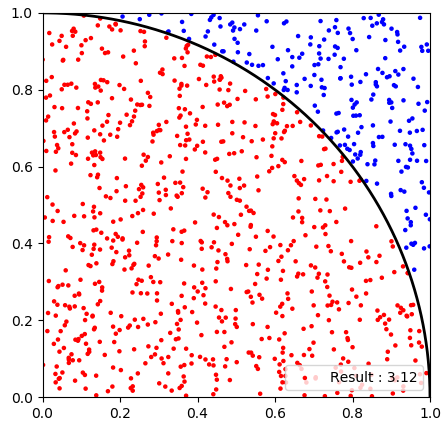
  - 이미지 출처: http://mathfaculty.fullerton.edu/mathews/n2003/montecarlopi/MonteCarloPiMod/Images/MonteCarloPiMod_gr_25.gif 

In [1]:
import numpy as np

 1. 로또 번호 자동 생성기(함수로)를 만드시오
 
 로또는 1 ~ 45까지의 숫자 중에서 랜덤으로 6개를 뽑되 중복 허용 X

In [2]:
def generate_lotto_nums():
    return np.random.choice(np.arange(1, 46), size=6, replace=False)
    
generate_lotto_nums()

array([36, 17, 34, 24,  1, 38])

 2. numpy를 이용하여 pi(원주율) 값을 계산하시오

원의 넓이: pir^2, 지금 이미지의 원이 4분의 1이고 반지름이 1이기 때문에 빨간색 부분의 넓이가 pi/4가 됨.

pi/4 : 1 = (4분원 안에 생성된 점 개수) : 전체  시도 횟수

pi = 4 * (4분원 안에 생성된 점 개수) / 전체 시도 횟수

전체 시도 횟수는 고정적이고, 천 만번으로 가정함.

pi = 4 * (4분원 안에 생성된 점 개수) / 1e7

랜덤으로 점을 생성해야하고, 점은 0과 1 사이에서 좌표로 표현돼야 함.

따라서 rand함수를 이용하고, 총 천만번을 던져야하기 때문에 row는 1000만번, 그리고 각 row는 두 개의 column으로 좌표 표시.

In [4]:
total = int(1e7)
points = np.random.rand(total, 2)
points

array([[0.92492969, 0.36057393],
       [0.83621898, 0.0623842 ],
       [0.15580923, 0.604733  ],
       ...,
       [0.26371088, 0.54106815],
       [0.85576058, 0.81800845],
       [0.21760526, 0.39553987]])

In [6]:
points.shape

(10000000, 2)

4분원 안에 들어갔다는 것은 x^2 + y^2이 1 보다 작다라는 것을 의미함.

In [7]:
points ** 2

array([[0.85549494, 0.13001356],
       [0.69926219, 0.00389179],
       [0.02427652, 0.365702  ],
       ...,
       [0.06954343, 0.29275474],
       [0.73232617, 0.66913782],
       [0.04735205, 0.15645179]])

각각의 제곱이 필요하기 때문에 제곱 행렬을 만들었음.

추가로, 두 좌표의 합이 필요하기 때문에 열을 따라가면서 sum 값이 필요함. (열 = axis = 1)

In [8]:
np.sum(points ** 2, axis = 1)

array([0.9855085 , 0.70315397, 0.38997852, ..., 0.36229817, 1.40146399,
       0.20380384])

In [9]:
np.sum(points ** 2, axis = 1) < 1

array([ True,  True,  True, ...,  True, False,  True])

우리는 True의 개수만 세면 되고, True는 1 False는 0이기 때문에 그대로 np.sum을 하면 자동으로 제곱의 합이 1보다 작은 개수를 세어줌.

In [12]:
## 4분원 안에 생성된 점 개수

np.sum(np.sum(points ** 2, axis = 1) < 1)

7856378

In [11]:
4 * np.sum(np.sum(points ** 2, axis=1) < 1) / total

3.1425512